In [4]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import os

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '18CSE305_Random_Forest.ipynb - Colaboratory.pdf',
 'heart_v2.csv',
 'Prac.ipynb']

In [7]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [9]:
df.shape

(270, 5)

In [10]:
X = df.drop('heart disease',axis = 1)
y = df['heart disease']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state = 42,n_jobs = -1,max_depth = 5,n_estimators = 100, oob_score=True)
# n_jobs refers to no.of cores to use, here -1 means to use all cores 
#max_depth refers to max depths of each tree in randomForest
#n_estimators refers to no. of trees used in randomForest

In [20]:
%%time
classifier_rf.fit(X_train,y_train)

CPU times: total: 78.1 ms
Wall time: 158 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
classifier_rf.oob_score_

0.656084656084656

In [22]:
classifier_rf.score(X_test,y_test)

0.654320987654321

# Grid Search for Parameter Finetuning

In [23]:
rf = RandomForestClassifier(random_state = 42,n_jobs=-1)

In [25]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [28]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=3,scoring='accuracy')

In [29]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 781 ms
Wall time: 24.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [30]:
grid_search.best_score_

0.6985815602836879

In [31]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

[Text(0.45454545454545453, 0.9166666666666666, 'sex <= 0.5\ngini = 0.5\nsamples = 117\nvalue = [95, 94]\nclass = Disease'),
 Text(0.18181818181818182, 0.75, 'cholestrol <= 226.5\ngini = 0.354\nsamples = 37\nvalue = [47, 14]\nclass = Disease'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.188\nsamples = 10\nvalue = [17, 2]\nclass = Disease'),
 Text(0.2727272727272727, 0.5833333333333334, 'BP <= 129.0\ngini = 0.408\nsamples = 27\nvalue = [30, 12]\nclass = Disease'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.095\nsamples = 10\nvalue = [19, 1]\nclass = Disease'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.5\nsamples = 17\nvalue = [11, 11]\nclass = Disease'),
 Text(0.7272727272727273, 0.75, 'age <= 63.5\ngini = 0.469\nsamples = 80\nvalue = [48, 80]\nclass = No Disease'),
 Text(0.6363636363636364, 0.5833333333333334, 'BP <= 116.0\ngini = 0.493\nsamples = 67\nvalue = [47, 60]\nclass = No Disease'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 

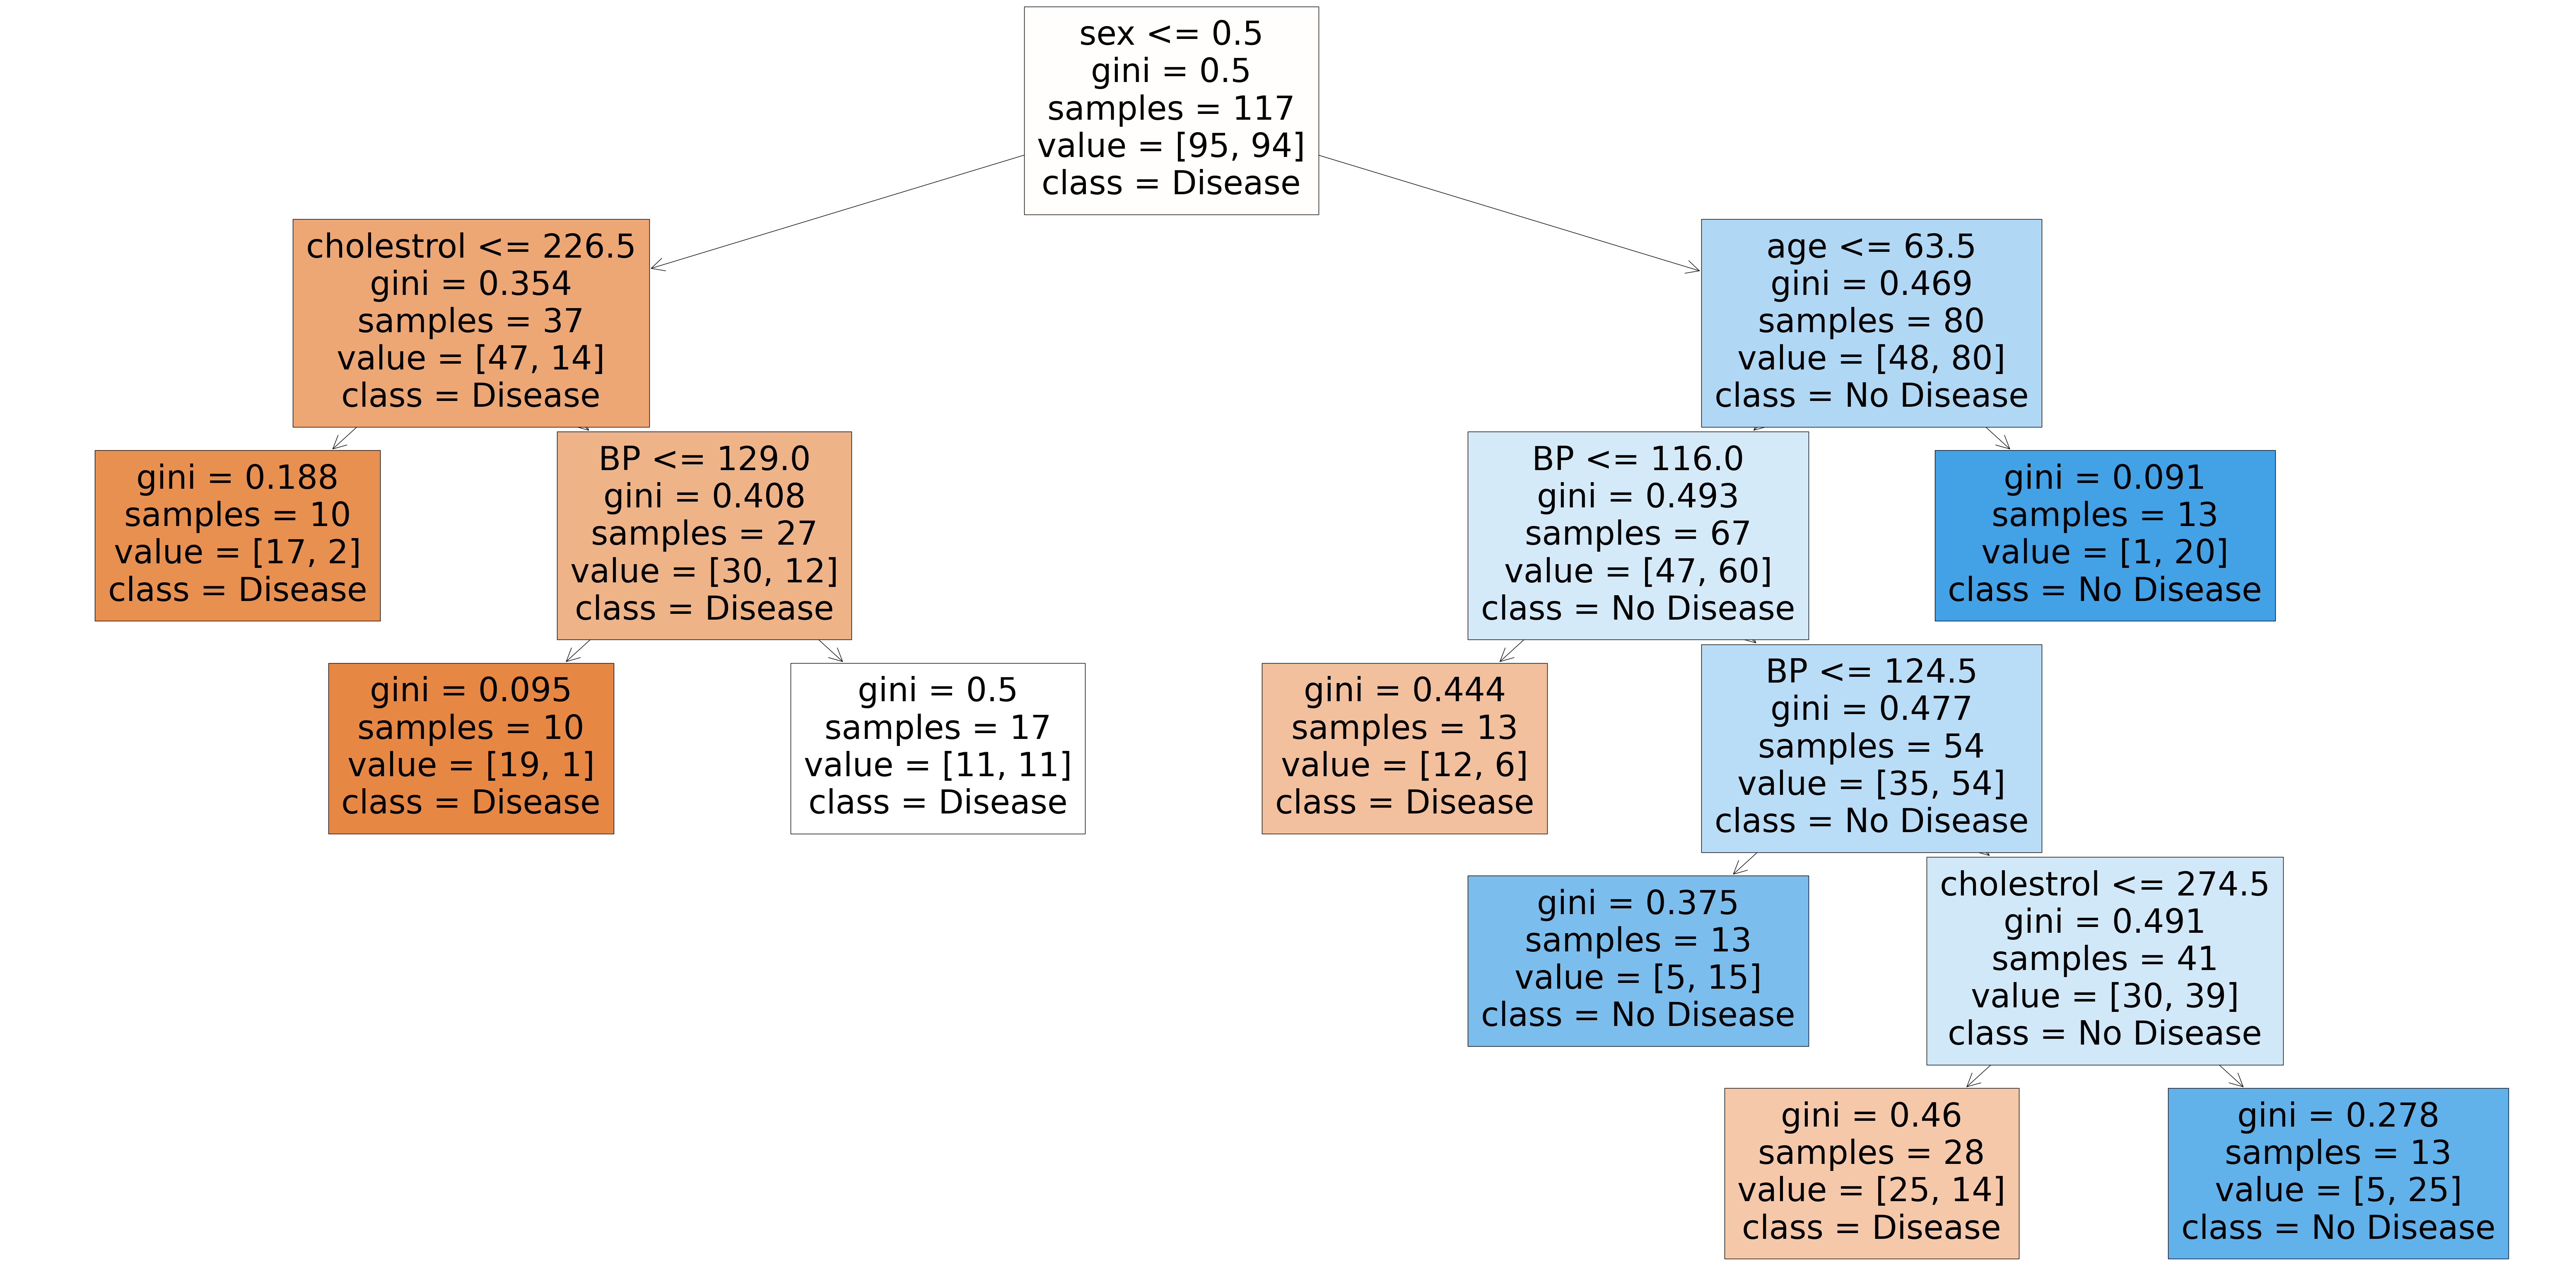

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9],feature_names = X.columns.tolist(),class_names=['Disease','No Disease'],filled=True)